<a href="https://colab.research.google.com/github/AlphonsaSabu/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IRIS SPECIES PREDICTION**

The Iris flower dataset consists of three species: setosa , versicolor, and virginica.The input features are 'sepal_length', 'sepal_width', 'petal_length' and 'petal_width'.The output feature or target variable is 'species'.

firstly imported all needed libraries.

In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,classification_report

In [220]:
#Loading data.
df=pd.read_csv('/content/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [221]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [223]:
df.shape

(150, 5)

**DATA PREPROCESSING**

In [226]:
#Finding missing values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [227]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

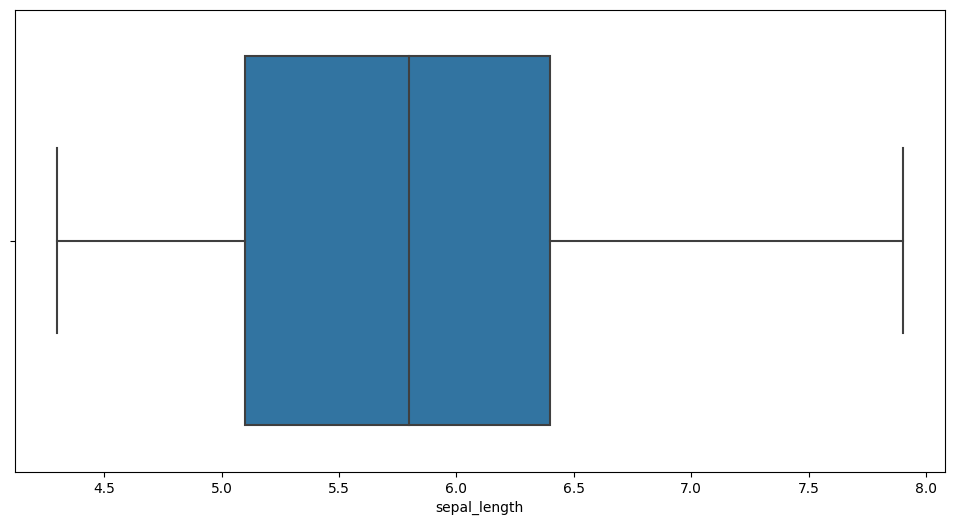

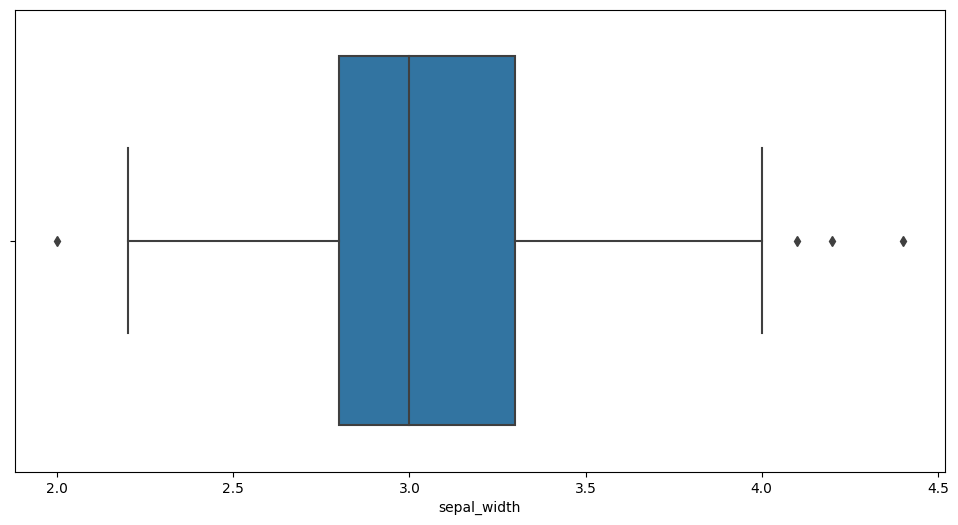

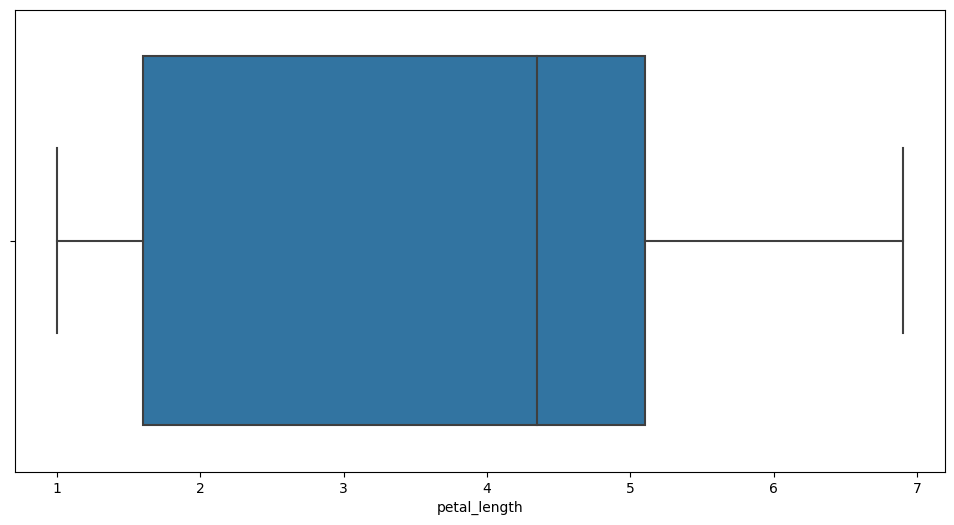

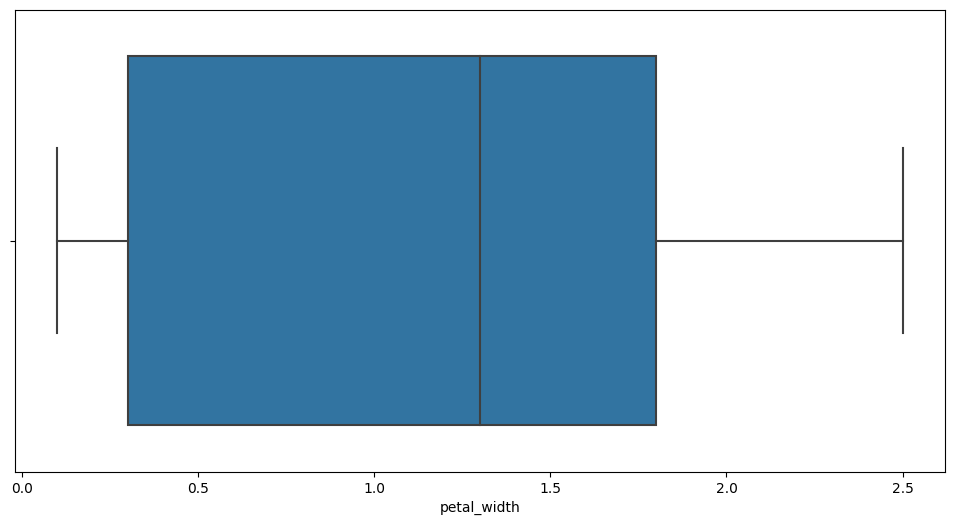

In [228]:
#Checking the presence of outliers.
for i in ['sepal_length','sepal_width','petal_length','petal_width']:
  plt.figure(figsize=(12,6))
  sns.boxplot(x=df[i])
  plt.xlabel(i)

In [229]:
Q1=df['sepal_width'].quantile(0.25)
Q3=df['sepal_width'].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1-(1.5*IQR)
upper_bound=Q3+(1.5*IQR)

In [230]:
print(lower_bound,upper_bound)

2.05 4.05


In [231]:
med=np.median(df['sepal_width'])
med

3.0

In [232]:
#Replacing outliers by median
df.loc[df['sepal_width']>upper_bound]=med
df.loc[df['sepal_width']<lower_bound]=med

<Axes: xlabel='sepal_width'>

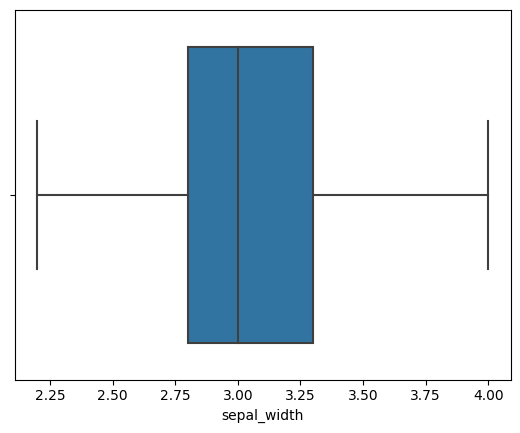

In [233]:
sns.boxplot(x='sepal_width',data=df)

In [235]:
#Checking unique values
df['species'].unique()

array(['Iris-setosa', 3.0, 'Iris-versicolor', 'Iris-virginica'],
      dtype=object)

In [236]:
ind=df[df['species']==3.0].index
ind

Int64Index([15, 32, 33, 60], dtype='int64')

In [237]:
#Replacing the element '3.0' by mode of that column.
md=df['species'].mode()[0]
df.loc[df['species']==3.0,'species']=md

In [238]:
#Splitting dataset into 'x' and 'y'.
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [239]:
#Splitting data into training and testing set.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)

In [240]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [241]:
y_train

81     Iris-versicolor
133     Iris-virginica
137     Iris-virginica
75     Iris-versicolor
109     Iris-virginica
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: species, Length: 105, dtype: object

In [243]:
#Normalization
scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

**DATA TRAINING**

In [244]:
model1=KNeighborsClassifier(n_neighbors=7)
model2=GaussianNB()
model3=LogisticRegression(max_iter=1000)
model4=DecisionTreeClassifier(criterion='entropy')
lst=[model1,model2,model3,model4]

In [245]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*200)

KNeighborsClassifier(n_neighbors=7)
1.0
[[17  0  0]
 [ 0 13  0]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

********************************************************************************************************************************************************************************************************
GaussianNB()
0.9777777777777777
[[17  0  0]
 [ 0 12  1]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.94      1.00      0.97        15

       accuracy      

All used models are best to predict the species of Iris flower.